In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="/css/all.min.css">
    <link rel="stylesheet" href="style.css">    
</head>
<body>
    
</body>
</html>

<p>
<img src="./pics/header_new.svg" style="float: center" width='3000px'/>
</p>

***

# A4 - Python through a DS example: part 2

> Francesco Trainotti $\,\,$ *francesco.trainotti@tum.de* <br>
> Domen Ocepek $\,\,$ *domen.ocepek@fs.uni-lj.si*


***

> ### <i class="fa fa-graduation-cap" aria-hidden="true"></i> Lesson highlights  
> - #### Introduction to frequency based substructuring (FBS) and interface conditions.
> - #### Derivation of FBS according to a primal formulation.
> - #### Derivation of FBS according to a dual formulation (LM-FBS).
> - #### Performing LM-FBS coupling/decoupling for a discrete N-DoF system.


> ### <i class="fa fa-book" aria-hidden="true"></i> Main literature  
> - de Klerk, D., Rixen, D. J., Voormeeren,S. (2008). General Framework for Dynamic Substructuring: History, Review and Classification of Techniques. In: AIAA Journal 46.5.
> - van der Seijs, M. V. (2016) Experimental dynamic substructuring: Analysis and design strategies for vehicle development. Delft University of Technology
> - Tiso, P., Allen, M. S., Rixen, D., Abrahamsson, T., Van der Seijs, M., Mayes, R. L. (2020) Substructuring in Engineering Dynamics - Emerging Numerical and Experimental Techniques. Springer.

## A4.1 Introduction to frequency based substructuring (FBS) and interface conditions


### Introduction to Frequency Based Substructuring

In Dynamic Substructuring (DS), the dynamical behaviour of a complex/large system is determined by the analysis of its mutually interacting sub-systems. 

One can distinguish between coupling and decoupling of dynamic systems as follows:
- **Coupling** is the process of assembly sub-systems by imposing physical boundary conditions to the common interface.
- **Decoupling** aims at identifying a standalone sub-system from the assembly by removing the influence of the other subsystem exerted through the interface connection.

In any case, the dynamic interaction between sub-systems (or substructures) is confined to a set of interface DoFs.

In terms of the modeling domain, a frequency-based approach is often preferred by experimentalists due to its ease of use and implementation with directly measured Frequency Response Functions (FRFs). In this context, datasets of measured transfer functions constitute the dynamic models of the substructures involved in the assembly/disassembly process. 

Let's consider the linearized equations of motion of a system composed by $n$ substructures in the frequency domain:

$\mathbf{Z}(\omega)\,\boldsymbol{u}(\omega)=\boldsymbol{f}(\omega)+\boldsymbol{g}(\omega)$

where $\mathbf{Z}(\omega)$ represent the block-diagonal frequency-dependent dynamic stiffness matrix $\mathbf{Z}(\omega)=\begin{bmatrix}\mathbf{Z}^1(\omega) & & \mathbf{0}\\ & \ddots &  \\ \mathbf{0} & &\mathbf{Z}^n(\omega) \end{bmatrix}$ and $\boldsymbol{u}(\omega)=\begin{bmatrix}\boldsymbol{u}^1(\omega) \\ \vdots \\ \boldsymbol{u}^n(\omega) \end{bmatrix}$, $\boldsymbol{f}(\omega)=\begin{bmatrix}\boldsymbol{f}^1(\omega) \\ \vdots \\ \boldsymbol{f}^n(\omega) \end{bmatrix}$, $\boldsymbol{g}(\omega)=\begin{bmatrix}\boldsymbol{g}^1(\omega) \\ \vdots \\ \boldsymbol{g}^n(\omega) \end{bmatrix}$ denote the vectors of displacements, forces and reaction forces.

Let's now assume two interacting subsystems to be assembled:

<p>
<center><img src="./pics/Assembly.png" width=800/></center>
</p>

Considering a partition between internal $(\star)_1,(\star)_3$ and interface $(\star)_2$ DoFs, the vector of displacements, forces and reaction forces can be written as:

$\boldsymbol{u}=\begin{bmatrix}
\boldsymbol{u}_1^{\mathrm A} \\ \boldsymbol{u}_2^{\mathrm A}  \\ \boldsymbol{u}_2^{\mathrm B} \\ \boldsymbol{u}_3^{\mathrm B} 
\end{bmatrix}, \quad 
\boldsymbol{f}=\begin{bmatrix}
\boldsymbol{f}_1^{\mathrm A} \\ \boldsymbol{f}_2^{\mathrm A}  \\ \boldsymbol{f}_2^{\mathrm B} \\ \boldsymbol{f}_3^{\mathrm B} 
\end{bmatrix}, \quad
\boldsymbol{g}=\begin{bmatrix}
\boldsymbol{0} \\ \boldsymbol{g}_2^{\mathrm A}  \\ \boldsymbol{g}_2^{\mathrm B} \\ \mathbf{0}
\end{bmatrix}.$

In order to assembly/disassembly the subsystems' dynamics, two physical conditions must be enforced:
- **compatibility of displacements**,
- **equilibrium of forces**.

### Interface conditions: compatibility of displacements

The first interface condition to be fulfilled is the compatibility of displacements at the matching interface DoFs of the two subsystems:

$\boldsymbol{u}^{\mathrm A}_{2}=\boldsymbol{u}^{\mathrm B}_{2}$.

This can be re-formulated by operating on the full set of physical DoFs $\boldsymbol{u}$ as:

$
\mathbf{B}\,\boldsymbol{u}=\mathbf{0}; \quad \mathbf{B}=
\begin{bmatrix}
\mathbf{0} & -\mathbf{I} &  \mathbf{I} & \mathbf{0} 
\end{bmatrix}.
$

The signed Boolean matrix $\mathbf{B}$ maps the corresponding matching interface DoFs. Each row of the matrix identifies a single pair of interface DoFs to be connected.

Alternatively, by substituting the physical coordinates $\boldsymbol{u}$ with a set of unique generalized coordinates $\boldsymbol{q}$:

$
\boldsymbol{u}=\mathbf{L}\boldsymbol{q} \implies \begin{cases}\boldsymbol{u}^{\mathrm A}_{1}=\boldsymbol{q}_{1} \\ \boldsymbol{u}^{\mathrm A}_{2}=\boldsymbol{q}_{2} \\ \boldsymbol{u}^{\mathrm B}_{2}=\boldsymbol{q}_{2} \\ \boldsymbol{u}^{\mathrm B}_{3}=\boldsymbol{q}_{3}  \end{cases}; \quad \mathbf{L}=
\begin{bmatrix}
\mathbf{I} & \mathbf{0} &  \mathbf{0} \\ 
\mathbf{0} & \mathbf{I} & \mathbf{0} \\
\mathbf{0} & \mathbf{I} &  \mathbf{0} \\
\mathbf{0} & \mathbf{0} &  \mathbf{I} 
\end{bmatrix}.
$

The localization Boolean matrix $\mathbf{L}$ maps the physical DoFs of all subsystems to the generalized global set $\mathbf{q}$.

The use of this coordinate transformation should remind you of a common finite element assembly procedure.

By using a unique set of coordinates $\boldsymbol{q}$, it is made implicit that the compatibility of displacements for $\boldsymbol{u}$ is automatically satisfied:

$
\mathbf{B}\,\boldsymbol{u}=\mathbf{B}\,\mathbf{L}\,\boldsymbol{q}=\mathbf{0} \quad \forall \boldsymbol{q}.
$

This means that $\mathbf{B}$ and $\mathbf{L}$ are each other's nullspaces:

$
\begin{array}{lcc}
\mathbf{L}=\text{null}(\mathbf{B}), \\ \mathbf{B}^{\mathrm T}=\text{null}(\mathbf{L}^{\mathrm T}).\end{array}
$

### Interface conditions: equilibrium of forces

The second conditions requires the force equilbrium at matching interface doFs to be satisfied according to the *actio et reactio* principle:

$\boldsymbol{g}^{\mathrm A}_{2}=-\boldsymbol{g}^{\mathrm B}_{2}$.

By back-projecting the vector of reaction forces $\boldsymbol{g}$ to the Boolean localization space $\mathbf{L}$, the interface forces are directly paired:

$ \begin{array}{lcc}
\mathbf{L}^{\mathrm T}\boldsymbol{g}=\mathbf{0} \implies \begin{cases} \boldsymbol{g}^{\mathrm A}_{1}=\mathbf{0} \\ \boldsymbol{g}^{\mathrm A}_{2}+\boldsymbol{g}^{\mathrm B}_{2}=\mathbf{0} \\ \boldsymbol{g}^{\mathrm B}_{3}=\mathbf{0} \end{cases}\end{array}.$

Alternatively, by using the signed Boolean matrix $\mathbf{B}$ the reaction forces $\boldsymbol{g}$ are replaced by a set of Lagrange multipliers $\boldsymbol{\lambda}$, which represent the intensity of the interface forces:

$\begin{array}{lcc}
\boldsymbol{g}=-\mathbf{B}^{\mathrm T}\boldsymbol{\lambda} \implies \begin{cases} \boldsymbol{g}^{\mathrm A}_{1}=\mathbf{0} \\ \boldsymbol{g}^{\mathrm A}_{2}= \boldsymbol{\lambda} \\\boldsymbol{g}^{\mathrm B}_{2}=-\boldsymbol{\lambda} \\ \boldsymbol{g}^{\mathrm B}_{3}=\mathbf{0} \end{cases}
\end{array}$.

Using the definition of Lagrange multipliers for the interface forces automatically satisfies the equilibrium condition. This can be verified by exploiting the mathematical relationship between $\mathbf{L}$ and $\mathbf{B}$:

$\mathbf{L}^{\mathrm T}\boldsymbol{g}=-\mathbf{L}^{\mathrm T}\mathbf{B}^{\mathrm T}\boldsymbol{\lambda}=\mathbf{0} \quad \forall \,\boldsymbol{g}$.

### Frequency based substructuring

Combining the equation of motion with the introduced interface conditions, the frequency-based formulation of the substructuring problem becomes:

$\begin{cases}
\mathbf{Z}(\omega)\,\boldsymbol{u}(\omega)=\boldsymbol{f}(\omega)+\boldsymbol{g}(\omega) \\ \mathbf{B}\,\boldsymbol{u}(\omega)=\mathbf{0} \\ \mathbf{L}^{\mathrm T}\boldsymbol{g}(\omega)=\mathbf{0}
\end{cases}$.

From here on the frequency-dependence will be omitted for simplicity.

Solving the above equations of motion could be expensive due to the interface unknown to be resolved, i.e. $\boldsymbol{u}$ and $\boldsymbol{g}$. Hence, the primal and dual formulations:
- **Primal**: satisfying a priori compatibility and solving for a unique set of interface displacements.
- **Dual**: satisfying a priori the equilibrium condition and solving for a new set of interface forces.


<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS Note:</b> The concept of primal vs dual has roots in the optimization field. According to the duality principle, 2 mirrored formulation of the same optimization problem exist: each variable in the primal form becomes a constraint in the dual and viceversa; therefore, the objective direction is inversed (maximization and minimization for primal and dual respectively).
</div>

## A4.2 Frequency based substructuring: a primal formulation

### Primal Assembly

The primal assembly starts by defining a unique set of generalized coordinates $\boldsymbol{q}$. The physical DoFs of all subsystems are mapped to $\boldsymbol{q}$ by applying the appropriate localization Boolean matrix $\mathbf{L}$ (see *Interface conditions: compatibility of displacements*) as $\boldsymbol{u}=\mathbf{L}\boldsymbol{q}$. The compatibility is thus satisfied a priori. 

<p>
<center><img src="./pics/Assembly.png" width=800/></center>
</p>

The equations of motion of the substructuring problem become:

$\begin{cases}
\mathbf{Z}^{\mathrm{A|B}}\mathbf{L}\boldsymbol{q}=\boldsymbol{f}+\boldsymbol{g} \\ \mathbf{L}^{\mathrm T}\boldsymbol{g}=\mathbf{0}
\end{cases}, \qquad \mathbf{Z}^{\mathrm{A|B}}=\begin{bmatrix}
\mathbf{Z}^\mathrm A & \mathbf{0} \\ 
\mathbf{0} & \mathbf{Z}^\mathrm B
\end{bmatrix}$.

The system is solved by premultiplying the first row by $\mathbf{L}^\mathrm T$, thus eliminating the interface forces and solving for the generalized interface displacement $\boldsymbol{q}$:

$\mathbf{\tilde{Z}}^{\mathrm{AB}}\boldsymbol{q}=\boldsymbol{p}, \qquad \mathbf{\tilde{Z}}^{\mathrm{AB}}=\mathbf{L}^T\mathbf{Z}^{\mathrm{A|B}}\mathbf{L} \quad \text{and}  \quad 
\boldsymbol{p}=\mathbf{L}^\mathrm T\boldsymbol{f}$,

where $\mathbf{\tilde{Z}}^\mathrm{AB}$ is the primally assembled impedance for the generalized DoFs. Note that the size of the matrix is reduced according to the number of generalized DoFs being considered.

This assembly procedure is analogous to a finite element assembly. Here, the subsystems act like the super-elements and their dynamic properties are 'added' through the matching interface DoFs. 

Consider the simple system depicted in *Introduction to Frequency Based Substructuring*. The primally assembled impedance can be written as follows:

$\mathbf{\tilde{Z}}^\mathrm{AB}=\mathbf{L}^\mathrm T\mathbf{Z}^\mathrm{A|B}\mathbf{L} \implies 
\begin{bmatrix}\mathbf{Z}^\mathrm A_{11} & \mathbf{Z}^\mathrm A_{12} & \mathbf{0} \\ 
\mathbf{Z}^\mathrm A_{21} & \mathbf{Z}^\mathrm A_{22}+\mathbf{Z}^\mathrm B_{22}& \mathbf{Z}^\mathrm B_{23} \\
\mathbf{0} & \mathbf{Z}^\mathrm B_{32} &\mathbf{Z}^\mathrm B_{33}\end{bmatrix}= \mathbf{L}^\mathrm T\begin{bmatrix}\mathbf{Z}^\mathrm A_{11} & \mathbf{Z}^\mathrm A_{12} & \mathbf{0}& \mathbf{0} \\ 
\mathbf{Z}^\mathrm A_{21} & \mathbf{Z}^\mathrm A_{22}  & \mathbf{0}& \mathbf{0} \\ 
\mathbf{0} & \mathbf{0} & \mathbf{Z}^\mathrm B_{22} &\mathbf{Z}^\mathrm B_{23} \\
\mathbf{0} & \mathbf{0} & \mathbf{Z}^\mathrm B_{32} &\mathbf{Z}^\mathrm B_{33} 
\end{bmatrix} \mathbf{L}
% , \qquad \mathbf{L}= \begin{bmatrix}
% \mathbf{I} & \mathbf{0} &  \mathbf{0} \\ 
% \mathbf{0} & \mathbf{I} & \mathbf{0} \\
% \mathbf{0} & \mathbf{I} &  \mathbf{0} \\
% \mathbf{0} & \mathbf{0} &  \mathbf{I} 
% \end{bmatrix}$,

with the localization matrix $\mathbf{L}$ defined as follows:

$ \qquad \mathbf{L}= \begin{bmatrix}
 \mathbf{I} & \mathbf{0} &  \mathbf{0} \\ 
 \mathbf{0} & \mathbf{I} & \mathbf{0} \\
 \mathbf{0} & \mathbf{I} &  \mathbf{0} \\
 \mathbf{0} & \mathbf{0} &  \mathbf{I} 
 \end{bmatrix}.$

### Primal Disassembly

A substructure decoupling procedure consists in the removal of the dynamic influence of a subsystem from the assembly in order to retrieve the remaining subsystem. In that sense, it can be considered as the 'reverse' operation of substructure coupling.

The reference representation of a disassembly procedure with corresponding DoFs is depicted:

<p>
<center><img src="./pics/Disassembly.png" width=1000/></center>
</p>

Considering a partition between internal $(\star)_1,(\star)_3$ and interface $(\star)_2$ DoFs, the vector of displacements, forces and reaction forces can be written as:

$\boldsymbol{u}=\begin{bmatrix}
\boldsymbol{u}^\mathrm {AB}_{1} \\ \boldsymbol{u}^\mathrm {AB}_{2} \\ \boldsymbol{u}^\mathrm {AB}_{3} \\ \boldsymbol{u}^\mathrm {A}_{1} \\ \boldsymbol{u}^\mathrm {A}_{2}
\end{bmatrix}, \quad 
\boldsymbol{f}=\begin{bmatrix}
\boldsymbol{0} \\ \boldsymbol{f}^\mathrm {AB}_{2} \\ \boldsymbol{f}^\mathrm {AB}_{3} \\ \boldsymbol{0} \\ \mathbf{0}
\end{bmatrix}, \quad
\boldsymbol{g}=\begin{bmatrix}
\boldsymbol{0} \\ \boldsymbol{g}_2^\mathrm {AB} \\ \boldsymbol{0} \\ \mathbf{0} \\ -\boldsymbol{g}_2^\mathrm {A} 
\end{bmatrix}.$

The decoupling operation in the primal domain can be formulated as a coupling between the assembled system dynamic stiffness $\mathbf{Z}^\mathrm{AB}$ and the negative dynamic stiffness of $\mathbf{Z}^\mathrm{A}$. The minus sign represents the subtraction operation: 

$\mathbf{\tilde{Z}}^\mathrm{B}=\mathbf{L}^\mathrm T\mathbf{Z}^\mathrm{AB|A}\mathbf{L} \implies 
\begin{bmatrix}
\cdot & \cdot & \cdot & \cdot\\ 
\cdot & \mathbf{Z}^\mathrm B_{22} & \mathbf{Z}^\mathrm B_{23} & \cdot\\
\cdot & \mathbf{Z}^\mathrm B_{32} &\mathbf{Z}^\mathrm B_{33} & \cdot \\
\cdot & \cdot & \cdot & \cdot
\end{bmatrix}=
\mathbf{L}^T\begin{bmatrix}\cdot & \cdot & \cdot & \cdot& \cdot \\ 
\cdot & \mathbf{Z}^\mathrm{AB}_{22} & \mathbf{Z}^\mathrm{AB}_{23} & \cdot& \mathbf{0} \\ 
\cdot & \mathbf{Z}^\mathrm{AB}_{32} & \mathbf{Z}^\mathrm{AB}_{33} & \cdot& \mathbf{0} \\ 
\cdot & \cdot & \cdot & \cdot & \cdot \\ 
\cdot & \mathbf{0} & \mathbf{0} & \cdot  & -\mathbf{Z}^\mathrm A_{22} \\ 
\end{bmatrix}\mathbf{L},$

with the localization matrix $\mathbf{L}$ defined as:

$\qquad \mathbf{L}= \begin{bmatrix}
 \cdot & \cdot &  \cdot& \cdot  \\ 
  \cdot & \mathbf{I} & \mathbf{0}& \cdot  \\
 \cdot & \mathbf{0} &  \mathbf{I}& \cdot  \\
 \cdot & \cdot &  \cdot&\cdot  \\
 \cdot & \mathbf{I} &  \mathbf{0}& \cdot 
\end{bmatrix}.$

## A4.3 Frequency based substructuring: a dual formulation (LM-FBS)

### Dual Assembly

Starting from the general formulation of the substructuring problem (see *Frequency based substructuring*), the dual approach chooses Lagrange multipliers $\boldsymbol{\lambda}$ as set of coupling forces according to the relation $\boldsymbol{g}=-\mathbf{B}^{\mathrm T}\boldsymbol{\lambda}$. The equilibrium is thus satisfied a priori.

<p>
<center><img src="./pics/Assembly.png" width=900/></center>
</p>

The equations of motion of the substructuring problem become:

$\begin{cases}
\mathbf{Z}^\mathrm{A|B}\boldsymbol{u}=\boldsymbol{f}-\mathbf{B}^\mathrm{T}\boldsymbol{\lambda} \\ \mathbf{B}\,\boldsymbol{u}=\mathbf{0} 
\end{cases}$.

This is often written in a symmetrical form as:

$\begin{bmatrix}
\mathbf{Z}^\mathrm{A|B} & \mathbf{B}^\mathrm T \\ 
\mathbf{B} & \mathbf{0}
\end{bmatrix}\begin{bmatrix}
\boldsymbol{u} \\ \boldsymbol{\lambda} 
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{f} \\ \mathbf{0}
\end{bmatrix}$.

To solve the system equations, let's first write them in the admittance notation:

$\begin{cases}
\boldsymbol{u}=\mathbf{Y}^\mathrm{A|B}(\boldsymbol{f}-\mathbf{B}^\mathrm{T}\boldsymbol{\lambda}) \\ \mathbf{B}\,\boldsymbol{u}=\mathbf{0} 
\end{cases}, \qquad \mathbf{Y}^\mathrm{A|B}=\begin{bmatrix}
\mathbf{Y}^\mathrm A & \mathbf{0} \\ 
\mathbf{0} & \mathbf{Y}^\mathrm B
\end{bmatrix}$.

By substituting the first line in the second line (compatibility constraint) and solving for $\boldsymbol{\lambda}$:

$\boldsymbol{\lambda}=\left(\mathbf{B}\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\mathbf{Y}^\mathrm{A|B}\boldsymbol{f}$.

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>Interpretation:</b>

- A displacement gap $\boldsymbol{\Delta{u}}=\mathbf{B}\mathbf{Y}^\mathrm{A|B}\boldsymbol{f}$ is formed between the still uncoupled subsystems' interface as a result of the applied excitation $\boldsymbol{f}$. 
    
- The interface forces $\boldsymbol{\lambda}$, defined by the Lagrange multipliers, are applied in order to close the gap and keep the subsystems together. 
    
- The stiffness operator between the force and the gap is named interface dynamic stiffness and is obtained by inverting the so called interface flexibility matrix $\mathbf{Y}_\mathrm{int}=\mathbf{B}\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}$.
</div>
<!-- **Interpretation**: A displacement gap $\mathbf{\Delta{u}}=\mathbf{B}\mathbf{Y}^{A|B}\mathbf{f}$ is formed between the still uncoupled subsystems' interface as a result of the applied excitation $\mathbf{f}$. The interface force $\boldsymbol{\lambda}$, defined by the Lagrange multipliers, is applied in order to close the gap and keep the subsystems together. The stiffness operator between the force and the gap is named interface dynamic stiffness and is obtained by inverting the so called interface flexibility matrix $\mathbf{Y}_{int}=\mathbf{B}\mathbf{Y}^{A|B}\mathbf{B}^{T}$. -->

By substituting back the $\boldsymbol{\lambda}$ in the first line of the governing equation of motion:

$\boldsymbol{u}=\mathbf{Y}^\mathrm{A|B}(\boldsymbol{f}-\mathbf{B}^\mathrm{T}\boldsymbol{\lambda}) \implies \boldsymbol{u}=\mathbf{Y}^\mathrm{A|B}\boldsymbol{f}-\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\left(\mathbf{B}\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\mathbf{Y}^\mathrm{A|B}\boldsymbol{f}$.

Due to its derivation, this formulation is referred to as **Lagrange multipliers - frequency based substructuring (LM-FBS)**.

The dually assembled admittance is written as:

$\mathbf{\hat{Y}}^\mathrm{AB}=\left[\mathbf{I}-\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\left(\mathbf{B}\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\right]\mathbf{Y}^\mathrm{A|B}$.

The dually assembled admittance $\mathbf{\hat{Y}}^\mathrm{AB}$ contains twice the interface DoFs and has the same size of the uncoupled admittance $\mathbf{Y}^\mathrm{A|B}$. The redundant DoFs may be removed when deemed necessary. This can be performed by exploiting the primal relations $\boldsymbol{u}=\mathbf{L}\,\boldsymbol{q}$ and  $\boldsymbol{p}=\mathbf{L}^\mathrm{T}\,\boldsymbol{f}$ to obtain the primally assembled admittance:

$\mathbf{\tilde{Y}}^\mathrm{AB}=\mathbf{L}^+\mathbf{\hat{Y}}^\mathrm{AB}(\mathbf{L}^\mathrm T)^+$,

where $(\star)^+$ denotes a pseudo-inversion.

#### Interface Problem

Note how the interface problem boils down to solving the linear problem $\mathbf{Y}_\mathrm{int}\boldsymbol{\lambda}=\boldsymbol{\Delta{u}}$, where the $\mathbf{Y}_\mathrm{int}$ contains the core of the assembly operation:

$\mathbf{Y}_\mathrm{int}=\mathbf{B}\mathbf{Y}^\mathrm{A|B}\mathbf{B}^\mathrm{T}=\mathbf{Y}^\mathrm{A}_{22}+\mathbf{Y}^\mathrm{B}_{22}$.

Therefore, according to the LM-FBS definition, the zeros of the sum of the interface FRFs of the subsystems to be coupled, correspond to the resonances of the assembled system. 

### Dual Disassembly

The dual decoupling problem consists of finding the interface forces that suppress the influence of **A** on **AB**, thus isolating the uncoupled response of subsystem **B**.

<p>
<center><img src="./pics/Disassembly.png" width=1200/></center>
</p>

Following the definition of decoupling, the equilibrium condition states that the interface forces that ensure the compatibility act in opposite direction on the assembled system **AB** (see the minus sign in the definition of reaction force vector in *Primal Disassembly*)

The decoupling can finally be formulated as a standard coupling procedure with a negative admittance for the system to be disassembled:

$\begin{cases}
\boldsymbol{u}=\mathbf{Y}^\mathrm{AB|A}(\boldsymbol{f}-\mathbf{B}^\mathrm{T}\boldsymbol{\lambda}) \\ \mathbf{B}\,\boldsymbol{u}=\mathbf{0} 
\end{cases}, \qquad \mathbf{Y}^\mathrm{AB|A}=\begin{bmatrix}
\mathbf{Y}^\mathrm{AB} & \mathbf{0} \\ 
\mathbf{0} & -\mathbf{Y}^\mathrm A
\end{bmatrix}$.

Analogously to the coupling formulation, the interface problem is solved as follows:

$\boldsymbol{\lambda}=\left(\mathbf{B}\mathbf{Y}^\mathrm{AB|A}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\mathbf{Y}^\mathrm{AB|A}\boldsymbol{f}$.

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>Interpretation:</b> The interface flexibility matrix $\mathbf{Y}_\mathrm{int}=\mathbf{B}\mathbf{Y}^\mathrm{AB|A}\mathbf{B}^\mathrm{T}$ relates the unknown multipliers $\boldsymbol{\lambda}$ with the interface displacements $\boldsymbol{u}_\mathrm{int}=\mathbf{B}\mathbf{Y}^\mathrm{AB|A}\boldsymbol{f}$. Let's consider the separate contributions of the dynamics of $\mathbf{AB}$ and $\mathbf{A}$. Given an external excitation $\boldsymbol{f}^\mathrm{AB}$, a displacement $\boldsymbol{u}_\mathrm{int}=\mathbf{B}^\mathrm{AB}\mathbf{Y}^\mathrm{AB}\boldsymbol{f}^\mathrm{AB}$ occurs at the interface as a result of the combined dynamics of $\mathbf{A}$ and $\mathbf{B}$. The connection forces $\boldsymbol{\lambda}=\left(\mathbf{B}^\mathrm{AB}\mathbf{Y}^\mathrm{AB}\mathbf{B}^\mathrm{{AB}^{T}}-\mathbf{B}^\mathrm{A}\mathbf{Y}^\mathrm{A}\mathbf{B}^\mathrm{{A}^{T}}\right)^{-1}\boldsymbol{u}_\mathrm{int}$ are then estimated to compensate for the dynamic contribution of the subsystem $\mathbf{A}$, thus removing its influence on $\mathbf{B}$.
</div>

<!-- **Interpretation**: The interface flexibility matrix $\mathbf{Y}_{int}=\mathbf{B}\mathbf{Y}^{AB|A}\mathbf{B}^{T}$ relates the unknown multipliers $\boldsymbol{\lambda}$ with the interface displacements $\mathbf{u}_{int}=\mathbf{B}\mathbf{Y}^{AB|A}\mathbf{f}$. Let's consider the separate contributions of the dynamics of $AB$ and $A$. Given an external excitation $\mathbf{f}^{AB}$, a displacement $\mathbf{u}_{int}=\mathbf{B}^{AB}\mathbf{Y}^{AB}\mathbf{f}^{AB}$ occurs at the interface as a result of the combined dynamics of $A$ and $B$. The connection forces $\boldsymbol{\lambda}=\left(\mathbf{B}^{AB}\mathbf{Y}^{AB}\mathbf{B}^{{AB}^{T}}-\mathbf{B}^{A}\mathbf{Y}^{A}\mathbf{B}^{{A}^{T}}\right)^{-1}\mathbf{u}_{int}$ are then estimated to compensate for the dynamic contribution of the subsystem $A$, thus removing its influence on $B$. -->

By solving according to the LM-FBS:

$\mathbf{\hat{Y}}^\mathrm{B}=\left[\mathbf{I}-\mathbf{Y}^\mathrm{AB|A}\mathbf{B}^\mathrm{T}\left(\mathbf{B}\mathbf{Y}^\mathrm{AB|A}\mathbf{B}^\mathrm{T}\right)^{-1}\mathbf{B}\right]\mathbf{Y}^\mathrm{AB|A}$.

#### Using measurements away from the interface

Decoupling offers a broader amount of potentially matching DoFs with respect to coupling. However, while the interface measurements play the core role in the substructuring process, the internal DoFs, theoretically, do not bring anything new to the game. Afterall, the interface decoupling problem to be solved remained $\mathbf{Y}_\mathrm{int}\boldsymbol{\lambda}=\boldsymbol{u}_\mathrm{int}$. 

In real life, however, erroneous modeling of the interface dynamics and measurement errors are the daily bread for experimentalists. The use of additional (internal) information between **AB** and **A** can help improving the observability, controllability and conditioning of the interface problem.

Different decoupling strategies can be adopted in terms of the choice of DoFs (collocated or non-collocated) for which compatibility and equilibrium conditions are imposed. 

Following these considerations, a generalized version of the LM-FBS is written as follows:

$\mathbf{\hat{Y}}^\mathrm{B}=\left[\mathbf{I}-\mathbf{Y}^\mathrm{AB|A}\mathbf{B}_\mathrm f^\mathrm{T}\left(\mathbf{B}_\mathrm u\mathbf{Y}^\mathrm{AB|A}\mathbf{B}_\mathrm f^\mathrm{T}\right)^{+}\mathbf{B}_\mathrm u\right]\mathbf{Y}^\mathrm{AB|A}$,

where potentially different Boolean matrices can be used for the compatibility $\mathbf{B}_\mathrm u$ and equilibrium $\mathbf{B}_\mathrm f$ conditions and $(\star)^+$ denotes a pseudo-inversion.

## A4.4 LM-FBS coupling in Python

The theoretical background will now be backed by a simple coupling example, performed using <code>Python</code>. For this, only two libraries are required:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Two substructures to be coupled are both simple discrete mass systems and each has 4 degrees of freedom. Substructure **A** is depicted in <font color='blue'>**blue**</font>: 

<p>
<img src="./pics/A.svg?1234" style="float: center; width: 350px"/>
</p>

And substructure **B** is depicted in <font color='red'>**red**</font> color:

<p>
<img src="./pics/B.svg?123" style="float: center; width: 350px"/>
</p>

Substructure **A** is inherited from the <a  href="https://gitlab.com/pyFBS/pyfbs-summer-school-content/-/tree/master/Day_1/A3"><code>A3</code></a> Lecture. The same approach is used to synthesize FRFs for substructure **B** that consist of the following masses and springs:

$m_5,\,m_6,\,m_7,\,m_8 = 2\,\text{kg}$

$k_4,\,k_5,\,k_6 = 100\,\text{N/m}$

Now let's examine the coupling configuration **AB**. DoFs <font color='blue'>**2, 3, 4**</font> and <font color='red'>**5, 6, 7**</font> from individual substructures are collocated so the assembly looks like this:

<p>
<img src="./pics/A_B.svg?123" style="float: center; width: 450px"/>
</p>

Hence interface between substructures consists of 3 degrees of freedom. The following sets of responses, applied forces, interface forces and uncoupled admittance can be defined from the figure above:

$$\boldsymbol{u} = \begin{bmatrix}u_1^\text{A}\\u_2^\text{A}\\u_3^\text{A}\\u_4^\text{A}\\
                                u_5^\text{B}\\u_6^\text{B}\\u_7^\text{B}\\u_8^\text{B}\end{bmatrix},\quad\boldsymbol{f} = \begin{bmatrix}f_1^\text{A}\\f_2^\text{A}\\f_3^\text{A}\\f_4^\text{A}\\
                                f_5^\text{B}\\f_6^\text{B}\\f_7^\text{B}\\f_8^\text{B}\end{bmatrix},\quad\boldsymbol{g} = \begin{bmatrix}0\\g_2^\text{A}\\g_3^\text{A}\\g_4^\text{A}\\
                                g_5^\text{B}\\g_6^\text{B}\\g_7^\text{B}\\0\end{bmatrix},\quad\mathbf{Y}^{\text{A|B}} = 
                                \begin{bmatrix}
                                Y_{11}^{\text{A}}&Y_{12}^{\text{A}}&Y_{13}^{\text{A}}&Y_{14}^{\text{A}}&0&0&0&0\\
                                Y_{21}^{\text{A}}&Y_{22}^{\text{A}}&Y_{23}^{\text{A}}&Y_{24}^{\text{A}}&0&0&0&0\\
                                Y_{31}^{\text{A}}&Y_{32}^{\text{A}}&Y_{33}^{\text{A}}&Y_{34}^{\text{A}}&0&0&0&0\\
                                Y_{41}^{\text{A}}&Y_{42}^{\text{A}}&Y_{43}^{\text{A}}&Y_{44}^{\text{A}}&0&0&0&0\\
                                0&0&0&0&Y_{55}^{\text{B}}&Y_{56}^{\text{B}}&Y_{57}^{\text{B}}&Y_{58}^{\text{B}}\\
                                0&0&0&0&Y_{65}^{\text{B}}&Y_{66}^{\text{B}}&Y_{67}^{\text{B}}&Y_{68}^{\text{B}}\\
                                0&0&0&0&Y_{75}^{\text{B}}&Y_{76}^{\text{B}}&Y_{77}^{\text{B}}&Y_{78}^{\text{B}}\\
                                0&0&0&0&Y_{85}^{\text{B}}&Y_{86}^{\text{B}}&Y_{87}^{\text{B}}&Y_{88}^{\text{B}}
                                \end{bmatrix}.$$

First, we import admittance matrices for each substructure ($\mathbf{Y}^\text{A}$ and $\mathbf{Y}^\text{B}$, respectively). For this example we use a full-DoF response models, which means FRFs for response and excitation at each combination of DoFs must be included.

In [3]:
Y_A = np.load('./data/Y_A.npy')
Y_B = np.load('./data/Y_B.npy')
Y_A.shape, Y_B.shape

((499, 4, 4), (499, 4, 4))

In `pyFBS`, shape `(frequencies, responses, impacts)` is adopted.

<div class="alert alert-block alert-warning">
    <i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    <b>Warning!</b> Always check matrix sizes and make sure they are correct and consistent!
</div>

For the consistency, frequency vector corresponding to $\mathbf{Y}^\text{A}$ and $\mathbf{Y}^\text{B}$ is also imported:

In [4]:
freq = np.load('./data/freq.npy')
freq.shape

(499,)

Next, construct an admittance matrix for the uncoupled system, containing substructure admittances:

$$\mathbf{Y}^\text{A|B} = \begin{bmatrix} 
\mathbf{Y}^\text{A} & \mathbf{0} \\
\mathbf{0} & \mathbf{Y}^\text{B}
\end{bmatrix}.$$

In [5]:
# prepare matrix full of zeros
Y_A_B = np.zeros((Y_A.shape[0], Y_A.shape[1]+Y_B.shape[1], Y_A.shape[2]+Y_B.shape[2]), dtype=complex) 

# add Y_A:
Y_A_B[:,:Y_A.shape[1],:Y_A.shape[1]] = Y_A
# add Y_B:
Y_A_B[:,Y_A.shape[2]:,Y_A.shape[2]:] = Y_B

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS TopTip:</b> Use <code>spy</code> plot from <code>matplotlib</code> library and check if uncoupled admittance matrix $\mathbf{Y}^\text{A|B}$ is properly assembled. Empty entries are white, while filled entries are black.
</div>

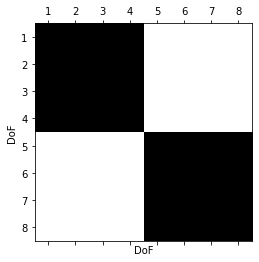

In [6]:
plt.spy(Y_A_B[0,:,:]) # display plot at arbitrary frequency, 0.01 Hz in this case
plt.xlabel('DoF')
plt.ylabel('DoF')
plt.xticks(np.arange(0,8,1),np.arange(1,9,1))
plt.yticks(np.arange(0,8,1),np.arange(1,9,1));

Now we must define compatibility and equilibrium conditions. Let us start with compatibility and put down all the interface DoFs where displacements of the individual substructures must match:

$$u_2^{\text{A}}=u_5^{\text{B}}\quad\Rightarrow\quad u_5^{\text{B}}-u_2^{\text{A}}=0,$$\
$$u_3^{\text{A}}=u_6^{\text{B}}\quad\Rightarrow\quad u_6^{\text{B}}-u_3^{\text{A}}=0,$$\
$$u_4^{\text{A}}=u_7^{\text{B}}\quad\Rightarrow\quad u_7^{\text{B}}-u_4^{\text{A}}=0.$$

We can now simply form Boolean matrix $\mathbf{B}$, that when multiplying $\mathbf{B}\,\boldsymbol{u}$ we obtain compatibility conditions stated above. We need to obtain three equations, so the number of rows equals 3, and we need to incorporate all 8 DoFs, so 8 is the number is columns. To summarize, shape of $\mathbf{B}$ equals $3\,\times\,8$.

In [7]:
B = np.zeros((3,8))

Multiplying first row of $\mathbf{B}$ with $\boldsymbol{u}$ should yield $u_5^{\text{B}}-u_2^{\text{A}}=0$:

$$\begin{bmatrix}0&-1&0&0&1&0&0&0\end{bmatrix}\begin{bmatrix}u_1^\text{A}\\u_2^\text{A}\\u_3^\text{A}\\u_4^\text{A}\\
                                u_5^\text{B}\\u_6^\text{B}\\u_7^\text{B}\\u_8^\text{B}\end{bmatrix} = u_5^{\text{B}}-u_2^{\text{A}} = 0.$$

We therefore write the first row of $\mathbf{B}$ as:

In [8]:
B[0,:] = np.array([0,-1,0,0,1,0,0,0])

Then we do the same with the second and third row:

In [9]:
B[1,:] = np.array([0,0,-1,0,0,1,0,0])
B[2,:] = np.array([0,0,0,-1,0,0,1,0])

Once you see the pattern of entries while constructing $\mathbf{B}$, the procedure can be significantly speed up. Let's start again:

In [10]:
B = np.zeros((3,8))
B[:,1:4] = -1*np.eye(3)
B[:,4:7] = np.eye(3)

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS TopTip:</b> Use <code>imageshow</code> plot from <code>matplotlib</code> library and check if a Boolean matrix is properly constructed.
</div>

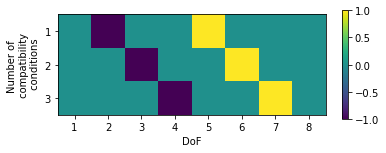

In [11]:
plt.imshow(B)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n compatibility \n conditions')
plt.xticks(np.arange(0,8,1), np.arange(1,9,1))
plt.yticks(np.arange(0,3,1), np.arange(1,4,1));

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS TopTip:</b> You can check if $\mathbf{B}\,\boldsymbol{u}$ truly yields compatibility conditions using <code>sympy</code> library for symbolic mathematics.
</div>

While using the LM FBS method, Boolean matrix $\mathbf{B}$ is also applied to ensure equilibrium conditions (see derivation above). As equilibrium must be forced at all three interface DoFs, the Lagrange multiplier vector can be defined as:

$$\boldsymbol{\lambda} = \begin{bmatrix}\lambda_1\\ \lambda_2\\ \lambda_3 \end{bmatrix},$$

and the size of $\boldsymbol{\lambda}$ matches the number of equilibrium conditions defined at the interface. Expanding the equation $\boldsymbol{g}=-\mathbf{B}^{\text{T}} \boldsymbol{\lambda}$ we obtain:

$$\boldsymbol{g}=\begin{bmatrix}0\\g_2^\text{A}\\g_3^\text{A}\\g_4^\text{A}\\
                                    g_5^\text{B}\\g_6^\text{B}\\g_7^\text{B}\\0
                                \end{bmatrix} = 
                                \begin{bmatrix} 0\\ \lambda_1\\ \lambda_2\\ \lambda_3\\
                                    -\lambda_1\\ -\lambda_2\\ -\lambda_3\\ 0
                                \end{bmatrix},$$

where we can see that the interface forces are of the same magnitude on collocated DoFs, both are opposite in sign (Newtons' third law):

$$g_2^{\text{A}}+g_5^{\text{B}}=0\quad\Rightarrow\quad \lambda_1+(-\lambda_1)=0,$$\
$$g_3^{\text{A}}+g_6^{\text{B}}=0\quad\Rightarrow\quad \lambda_2+(-\lambda_2)=0,$$\
$$g_4^{\text{A}}+g_7^{\text{B}}=0\quad\Rightarrow\quad \lambda_3+(-\lambda_3)=0.$$

For the LM FBS method, having defined $\mathbf{Y^{\text{A|B}}}$ and $\mathbf{B}$ is already sufficient to perform coupling:

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS TopTip:</b> Use <code>@</code> or <code>numpy.mathmul</code> for matrix multiplication.
</div>

$$\mathbf Y^{\text{AB}} = \mathbf Y^{\text{A|B}} - \mathbf Y^{\text{A|B}}\,\mathbf B^\mathrm{T} \left( \mathbf B \mathbf Y^{\mathrm{A|B}} \mathbf{B}^\mathrm{T} \right)^{-1} \mathbf B \mathbf Y^\text{A|B}.$$

In [12]:
Y_AB = Y_A_B - Y_A_B @ B.T @ np.linalg.inv(B@Y_A_B@B.T) @ B @ Y_A_B
Y_AB.shape

(499, 8, 8)

In this manner we obtain structural admittance for the following structure:

<p>
<img src="./pics/AB.svg?1234" style="float: center; width: 400px"/>
</p>

By checking the size of newly formed $\mathbf{Y}^{\text{AB}}$ we can see that it consist of 8 DoFs, but truly there are only 5 unique DoFs of the AB assembly. With LM FBS the coupled admittance is defined for all DoFs at the interface (6 - from both A and B substructures) where only 3 unique DoFs exist. Interface DoFs appear twice. Because of the compatibility and equilibrium at the interface FRFs are identical for all collocated DoFs from A and B. We can check than by simply comparing collocated entries in $\mathbf{Y}^{\text{AB}}$, for instance:

In [13]:
np.allclose(Y_AB[:,1,:],Y_AB[:,4,:])

True

There are two different ways how to obtain $\mathbf{Y}^{\text{AB}}$ for unique DoFs only. One is simply removing the redundant entries from the $\mathbf{Y}^{\text{AB}}$ matrix manually:

In [14]:
Y_AB_unique = Y_AB[:,[[0],[1],[2],[3],[-1]],[0,1,2,3,-1]]
Y_AB_unique.shape

(499, 5, 5)

In [15]:
np.allclose(Y_AB_unique[:,1,:],Y_AB_unique[:,4,:])

False

Or we can apply localization matrix $\mathbf{L}$ to extract unique DoFs only. In order to obtain $\mathbf{L}$, we must define unique degrees of freedom. For our case, we have 5 unique DoFs:

$$\boldsymbol{q} = \begin{bmatrix}q_1 \\ q_2 \\ q_3 \\ q_4 \\ q_5\end{bmatrix},$$ 

If unique DoFs are expanded on the full-DoF set (including repeated DoFs), the following mapping is obtained (fullfilling compatibility conditions that the collocated DoFs have the same response):

$$\begin{bmatrix}u_1^\text{A}\\u_2^\text{A}\\u_3^\text{A}\\u_4^\text{A}\\
                                u_5^\text{B}\\u_6^\text{B}\\u_7^\text{B}\\u_8^\text{B}\end{bmatrix}
=
\begin{bmatrix}q_1 \\ q_2 \\ q_3 \\ q_4 \\ q_2 \\ q_3 \\ q_4 \\ q_5 \end{bmatrix}.
$$

Expansion from $\boldsymbol{q}$ to $\boldsymbol{u}$ is achieved by using localization matrix $\mathbf{L}$:

$$\begin{bmatrix} 1 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}q_1 \\ q_2 \\ q_3 \\ q_4 \\ q_5\end{bmatrix} = \begin{bmatrix}q_1 \\ q_2 \\ q_3 \\ q_4 \\ q_2 \\ q_3 \\ q_4 \\ q_5 \end{bmatrix} = \begin{bmatrix}u_1^\text{A}\\u_2^\text{A}\\u_3^\text{A}\\u_4^\text{A}\\
                                u_5^\text{B}\\u_6^\text{B}\\u_7^\text{B}\\u_8^\text{B}\end{bmatrix}.$$

In [16]:
L = np.zeros((8,5))
L[:4,:4] = np.eye(4)
L[-4:,1:] = np.eye(4)

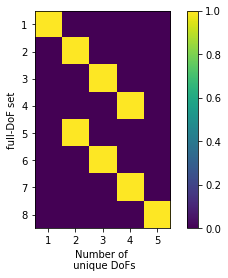

In [17]:
plt.imshow(L);
plt.colorbar()
plt.xlabel('Number of \n unique DoFs')
plt.ylabel('full-DoF set')
plt.yticks(np.arange(0,8,1), np.arange(1,9,1))
plt.xticks(np.arange(0,5,1), np.arange(1,6,1));

$$\mathbf{\tilde{Y}}^{\text{AB}} = \mathbf L^+ \, \mathbf{Y}^{\text{AB}} \left( \mathbf{L}^{\text{T}} \right)^+.$$

In [18]:
Y_AB_unique_ = np.linalg.pinv(L) @ Y_AB @ np.linalg.pinv(L.T) 

In [19]:
np.allclose(Y_AB_unique,Y_AB_unique_)

True

And for the final step, let us compare coupled FRFs of AB assembly with the actual ones:

In [20]:
Y_AB_true = np.load('./data/Y_AB.npy')

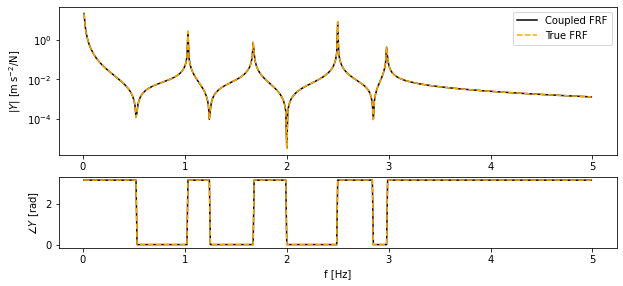

In [21]:
i = 0
o = 0

plt.subplots(figsize=(10,6))
plt.subplot(211)
plt.semilogy(freq, np.abs(Y_AB_unique[:,o,i]), color='k', label='Coupled FRF')
plt.semilogy(freq, np.abs(Y_AB_true[:,o,i]), '--', color='orange', label='True FRF')
plt.legend(loc=0)
plt.ylabel(r'$|Y|$ [m$\,$s$^{-2}$/N]')

plt.subplot(413)
plt.plot(freq, np.angle(Y_AB_unique[:,o,i]), color='k', label='Coupled FRF')
plt.plot(freq, np.angle(Y_AB_true[:,o,i]), '--', color='orange', label='True FRF')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\angle Y$ [rad]');

<div class="alert alert-block alert-success">
    <i class="fa fa-thumbs-up" aria-hidden="true"></i>
    <b>Success!</b> It's a perfect match!
</div>

In [22]:
np.allclose(Y_AB_true, Y_AB_unique)

True

## A4.5 LM-FBS decoupling in Python

A second example is a decoupling example, where the inverse procedure is presented: based on known admittances of structures AB and B, $\mathbf{Y}^{\text{A}}$ is obtained. AB, A, and B are unchanged from the previous case, but only for the sake of simplicity, the new numbering of DoFs is introduced. Structure **AB** is depicted in <font style="color:#FFA500">**orange**</font> and consists of 5 DoFs:

<p>
<img src="./pics/AB.svg?1234" style="float: center; width: 400px"/>
</p>

From AB we decouple **B** depicted in <font color="red">**red**</font>:

<p>
<img src="./pics/decoupling.svg?12345" style="float: center; width: 500px"/>
</p>

in order to obtain the structural admittance of **A** in <font color="blue">**blue**</font>.

The following sets of responses, applied forces, interface forces and un(de)coupled admittance can be defined from the figures above:

$$\boldsymbol{u} = \begin{bmatrix}u_1^\text{AB}\\u_2^\text{AB}\\u_3^\text{AB}\\u_4^\text{AB}\\
                                u_5^\text{AB}\\u_6^\text{B}\\u_7^\text{B}\\u_8^\text{B}
                                \\u_9^\text{B}\end{bmatrix},\quad
\boldsymbol{f} = \begin{bmatrix}f_1^\text{AB}\\f_2^\text{AB}\\f_3^\text{AB}\\f_4^\text{AB}\\
                                f_5^\text{AB}\\f_6^\text{B}\\f_7^\text{B}\\f_8^\text{B}\\f_9^\text{B}
                                \end{bmatrix},\quad
\boldsymbol{g} = \begin{bmatrix}0\\g_2^\text{AB}\\g_3^\text{AB}\\g_4^\text{AB}\\
                                g_5^\text{AB}\\g_6^\text{B}\\g_7^\text{B}\\g_8^\text{B}\\0
                                \end{bmatrix},\quad\mathbf{Y}^{\text{AB|B}} = 
                                \begin{bmatrix}
                                Y_{11}^{\text{AB}}&Y_{12}^{\text{AB}}&Y_{13}^{\text{AB}}&Y_{14}^{\text{AB}}&Y_{15}^{\text{AB}}&0&0&0&0\\
                                Y_{21}^{\text{AB}}&Y_{22}^{\text{AB}}&Y_{23}^{\text{AB}}&Y_{24}^{\text{AB}}&Y_{25}^{\text{AB}}&0&0&0&0\\
                                Y_{31}^{\text{AB}}&Y_{32}^{\text{AB}}&Y_{33}^{\text{AB}}&Y_{34}^{\text{AB}}&Y_{35}^{\text{AB}}&0&0&0&0\\
                                Y_{41}^{\text{AB}}&Y_{42}^{\text{AB}}&Y_{43}^{\text{AB}}&Y_{44}^{\text{AB}}&Y_{45}^{\text{AB}}&0&0&0&0\\
                                Y_{51}^{\text{AB}}&Y_{52}^{\text{AB}}&Y_{53}^{\text{AB}}&Y_{54}^{\text{AB}}&Y_{55}^{\text{AB}}&0&0&0&0\\
                                0&0&0&0&0&-Y_{66}^{\text{B}}&-Y_{67}^{\text{B}}&-Y_{68}^{\text{B}}&-Y_{69}^{\text{B}}\\
                                0&0&0&0&0&-Y_{76}^{\text{B}}&-Y_{77}^{\text{B}}&-Y_{78}^{\text{B}}&-Y_{79}^{\text{B}}\\
                                0&0&0&0&0&-Y_{86}^{\text{B}}&-Y_{87}^{\text{B}}&-Y_{88}^{\text{B}}&-Y_{89}^{\text{B}}\\
                                0&0&0&0&0&-Y_{96}^{\text{B}}&-Y_{97}^{\text{B}}&-Y_{98}^{\text{B}}&-Y_{99}^{\text{B}}
                                \end{bmatrix}.$$

To avoid any conflicts between variable names we again import all the necessary structural admittances:

In [23]:
Y_AB = np.load('./data/Y_AB.npy')
Y_B = np.load('./data/Y_B.npy')

And then assemble them into full-DoFs un(de)coupled admittance matrix. As mentioned above in the theoretical derivation, the LM FBS can be used to decouple substructures by simply adding a negative sign to the admittances of substructure to decouple ($\mathbf{Y}^\text{B}$ in our case):

In [24]:
# prepare matrix full of zeros
Y_AB_B = np.zeros((Y_AB.shape[0], Y_AB.shape[1]+Y_B.shape[1], Y_AB.shape[2]+Y_B.shape[2]), dtype=complex) 

# add Y_AB:
Y_AB_B[:,:Y_AB.shape[1],:Y_AB.shape[1]] = Y_AB
# add Y_B:
Y_AB_B[:,Y_AB.shape[2]:,Y_AB.shape[2]:] = -1*Y_B

Using <code>spy</code> plot we make sure the admittances of individual structures are entered correctly:

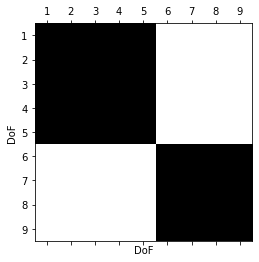

In [25]:
plt.spy(Y_AB_B[0,:,:]) # display plot at arbitrary frequency, 0.01 Hz in this case
plt.xlabel('DoF')
plt.ylabel('DoF')
plt.xticks(np.arange(0,9,1),np.arange(1,10,1))
plt.yticks(np.arange(0,9,1),np.arange(1,10,1));

And that wraps up the process of obtaining un(de)coupled admittance $\textbf{Y}^\text{AB|B}$. Next, we must establish compatibility and equilibrium conditions by defining Boolean matrix $\mathbf{B}$. In this showcase, we construct $\mathbf{B}$ based on the compatibility between AB and B:

$$u_2^{\text{AB}}=u_6^{\text{B}}\quad\Rightarrow\quad u_6^{\text{B}}-u_2^{\text{AB}}=0,$$\
$$u_3^{\text{AB}}=u_7^{\text{B}}\quad\Rightarrow\quad u_7^{\text{B}}-u_3^{\text{AB}}=0,$$\
$$u_4^{\text{AB}}=u_8^{\text{B}}\quad\Rightarrow\quad u_8^{\text{B}}-u_4^{\text{AB}}=0.$$

We can see, based on 3 compatibility conditions for 9 DoFs, the size of $\mathbf{B}$ should be equal to $3\, \times \, 9$:

In [26]:
B = np.zeros((3,9))

In order for $\mathbf{B}\,\boldsymbol{u}$ to yield equation $u_6^{\text{B}}-u_2^{\text{AB}}=0$ the first row of $\mathbf{B}$ should be equal to:

In [27]:
B[0,:] = np.array([0,-1,0,0,0,1,0,0,0])

We repeat the same for the three remaining compatibility conditions:

In [28]:
B[1,:] = np.array([0,0,-1,0,0,0,1,0,0])
B[2,:] = np.array([0,0,0,-1,0,0,0,1,0])

Or we can quickly build up $\mathbf{B}$ from the repeating pattern:

In [29]:
B = np.zeros((3,9))
B[:,1:4] = -1*np.eye(3)
B[:,5:-1] = np.eye(3)

Again we can check $\mathbf{B}$'s correctness by using an <code>image-show</code> plot from <code>matplotlib</code>:

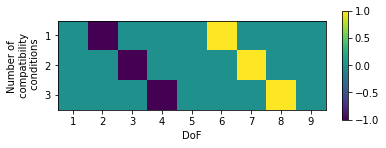

In [30]:
plt.imshow(B)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n compatibility \n conditions')
plt.xticks(np.arange(0,9,1), np.arange(1,10,1))
plt.yticks(np.arange(0,3,1), np.arange(1,4,1));

And with $\mathbf{Y}^{\text{AB|B}}$ and $\mathbf{B}$ assembled, we can obtain admittance of substructure **A**:

$$\mathbf Y^{\text{A}} = \mathbf Y^{\text{AB|B}} - \mathbf Y^{\text{AB|B}}\,\mathbf B^\mathrm{T} \left( \mathbf B \mathbf Y^{\mathrm{AB|B}} \mathbf{B}^\mathrm{T} \right)^{-1} \mathbf B \mathbf Y^\text{AB|B}.$$

In [31]:
Y_A = Y_AB_B - Y_AB_B @ B.T @ np.linalg.inv(B@Y_AB_B@B.T) @ B @ Y_AB_B
Y_A.shape

(499, 9, 9)

If we again check the size $\mathbf{Y}^{\text{AB}}$ we can see that it again consist of repeating DoFs at the interface, where each appears twice. FRFs are again identical for all collocated DoFs from AB and B, so we can simply remove them by matrix slicing at A's DoFs:

In [32]:
Y_A_unique = Y_A[:,[[0],[1],[2],[3]],[0,1,2,3]]
Y_A_unique.shape

(499, 4, 4)

And finally, compare them with FRFs derived directly for A:

In [33]:
Y_A_true = np.load('./data/Y_A.npy')

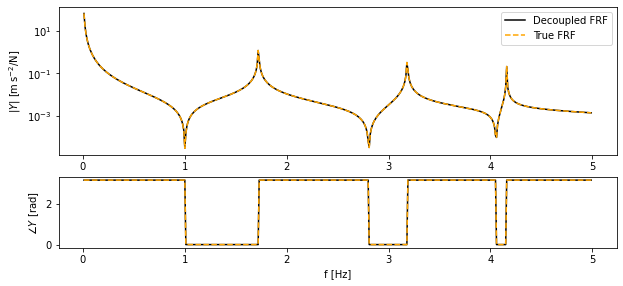

In [34]:
i = 0
o = 0

plt.subplots(figsize=(10,6))
plt.subplot(211)
plt.semilogy(freq, np.abs(Y_A_unique[:,o,i]), color='k', label='Decoupled FRF')
plt.semilogy(freq, np.abs(Y_A_true[:,o,i]), '--', color='orange', label='True FRF')
plt.legend(loc=0)
plt.ylabel(r'$|Y|$ [m$\,$s$^{-2}$/N]')

plt.subplot(413)
plt.plot(freq, np.angle(Y_A_unique[:,o,i]), color='k', label='Decoupled FRF')
plt.plot(freq, np.angle(Y_A_true[:,o,i]), '--', color='orange', label='True FRF')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\angle Y$ [rad]');

<div class="alert alert-block alert-success">
    <i class="fa fa-thumbs-up" aria-hidden="true"></i>
    <b>Success!</b> It's a perfect match!
</div>

In [35]:
np.allclose(Y_A_true, Y_A_unique)

True

> <i class="fa fa-quote-right"></i> <b>That's a wrap! Want to know more?</b> 
> <ul>
    <li>de Klerk, D., Rixen, D. J., Voormeeren,S. (2008). General Framework for Dynamic Substructuring: History, Review and Classification of Techniques. In: AIAA Journal 46.5.</li>
    <li>van der Seijs, M. V. (2016) Experimental dynamic substructuring: Analysis and design strategies for vehicle development. Delft University of Technology, <a href="https://repository.tudelft.nl/islandora/object/uuid:28b31294-8d53-49eb-b108-284b63edf670?collection=research">10.4233/uuid:28b31294-8d53-49eb-b108-284b63edf670</a>.</li>
   <li> Tiso, P., Allen, M. S., Rixen, D., Abrahamsson, T.,
Van der Seijs, M., Mayes, R. L. (2020) Substructuring in
Engineering Dynamics - Emerging Numerical and
Experimental Techniques. Springer </a>.</li>
    <li> De Klerk, D., Rixen, D. J., De Jong, J. (2006) The frequency based substructuring (FBS)
method reformulated according to the dual domain decomposition method. In: 24th International
Modal Analysis Conference. St.Louis, MO </a>.</li>
  <li> Rixen, D., Godeby, T., Pagnacco, E. (2006) Dual Assembly of substructures and the FBS
Method: Application to the Dynamic Testing of a Guitar. In: International Conference on
Noise and Vibration Engineering, ISMA. KUL. Leuven, Belgium, Sept</a>.</li>
   <li> Voormeeren, S., Rixen, D. (2012) A family of substructure decoupling techniques based on a
dual assembly approach”. In: Mechanical Systems and Signal Processing 27, pp. 379–
396 </a>.</li>
   <li> D’Ambrogio, W. and Fregolent, A. (2011) Direct decoupling of substructures using primal and
dual formulation. In: Proceedings of 29th IMAC, a Conference on Structural Dynamics, pp. 47–76 </a>.</li>
</ul>

[1]:http://www.quotedb.com/quotes/2112